# Data Preparation

## Feature Selection

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv

### Dataset description and upload

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old.

#### Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Taux de glucose dans le plasma)

pres = Diastolic blood pressure (mm Hg) (Tension artérielle)

skin = Triceps skin fold thickness (mm) (épaisseur de peau au niveau du triceps, Mesure de plis cutanés)

test = 2-Hour serum insulin (mu U/ml) (Taux d'insuline)

mass = Body mass index (weight in kg/(height in m)^2) (Indice de masse corporelle)

pedi = Diabetes pedigree function

age = Age (years)

diabete = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### Load data in dataframe

In [2]:
file="diabetes.csv"

In [5]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabete']
df = pd.read_csv(file, names=names)
df

,preg,plas,pres,skin,test,mass,pedi,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Description Quantitative

In [10]:
# afficher les premières lignes du jeu de données
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# dimensions : nombre de lignes et nombre de colonnes
# La ligne d'en-tête n'est pas comptabilisée
df.shape

(768, 9)

In [13]:
# énumération des colonnes
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'diabete'],
      dtype='object')

In [30]:
#DESCRIPTION DES DONNEES
df.describe()
# OR df.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Certains indicateurs statistiques ne sont pas valables que pour les variables numériques (ex. moyenne, médiane, etc.) et inversement pour les non-numériques (ex. top, freq, etc.), dans ce cas on trouve des NAN dans certaines situations.

In [27]:
(df['preg']==17).value_counts()

False    744
True      24
Name: preg, dtype: int64

In [15]:
df.isnull().values.any()

False

In [31]:
df[['plas','diabete']]

,plas,diabete
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


### Description graphique

In [14]:
# voir les graphiques dans le notebook
%matplotlib inline
# importation de librairie
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002467A16C250>]],
      dtype=object)

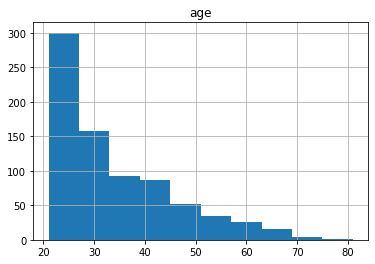

In [15]:
# histogramme de l'âge
df.hist(column='age')

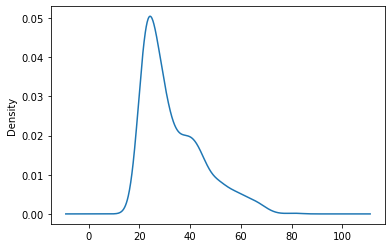

In [32]:
# density plot
# kernel density estimation
df['age'].plot.kde()

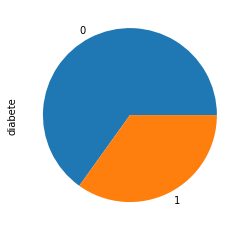

In [33]:
# diagramme à secteurs - comptage de sexe
df['diabete'].value_counts().plot.pie()

## Feature Selection

In [36]:
array = df.values
X1 = array[:,0:8]
Y1 = array[:,8]

In [29]:
X1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [30]:
Y1

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Filter Methods
#### Statistical Methods (Ex: SelectKBest, Chi-Squared)

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared.

Le test du chi-carré est un test statistique dindépendance pour déterminer la dépendance de deux variables.


Supposons que vous ayez une variable cible (label) et d'autres caractéristiques (variables de caractéristiques) qui décrivent chaque observation de données.

Chi-carré consiste à faire des calculs statistiques entre chaque variable caractéristique et la variable cible (label) et observer l'existence d'une relation entre les variables et la cible.

Si la variable cible est indépendante de la variable caractéristique, nous pouvons rejeter cette variable caractéristique. S'ils sont dépendants, la variable caractéristique est très importante.

In [37]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# Feature selection
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X1, Y1)

In [39]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [41]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'diabete'],
      dtype='object')

In [34]:
features = fit.transform(X1)
# Summarize selected features
print(features[0:5,:])
#features[0:5,:]

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


#### Interprétation: 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabete'
Vous pouvez voir les scores pour chaque attribut et les 4 attributs choisis (ceux avec les scores les plus élevés):   test,plas, age, mass. Ces scores vous aideront davantage à déterminer les meilleures features pour entraîner votre modèle.

### Filter Methods
#### Feature Importance

In [46]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X1, Y1)
print(model.feature_importances_)

[0.109 0.239 0.099 0.081 0.079 0.14  0.115 0.138]


#### Interprétation: 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabete'
Vous pouvez voir que les features les plus importants sont plas, mass et age (ceux avec les scores les plus élevés)

### Wrapper Methods
#### RFE (Recursive Feature Elimination)

La Recursive Feature Elimination (RFE) correspond à l'élimination récursive et successive des variables qui contribuent le moins à la discrimination.
L'apprentissage est réalisé avec l'ensemble des variables, la variable la moins discriminante est supprimée, puis l'apprentissage est réalisé sur les p-1 variables restantes et ce processus est itéré jusqu’à obtenir le nombre de variables désiré.

Dans l'exemple ci-dessous, on utilise la RFE avec l'algorithme logistic Regression pour sélectionner 3 features qui contribuent le plus à la classification

In [47]:
# Feature Selection with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [49]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X1, Y1)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Ines\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Ines\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


#### Interprétation: 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diabete'
Vous pouvez voir que les features les plus importants sont preg, pedi et age 

## A Faire: Retourner les meilleurs features avec 

   ## SelectKBest avec le Test f_classif
    
   ## Tip: from sklearn.feature_selection import f_classif